# [Recipe1M](http://im2recipe.csail.mit.edu) data set analysis
Analysis of dataset should contain: 
* [Plantuml](https://plantuml.com/de/json) diagram of json structure 
* Amount of recipes
* Plots:
 * Num of Instructions
 * Num of Ingredients
 * Most used words in Instructions
 * Most used words in Ingedients
 * (Optional) Kind of dish

In [1]:
import json
import matplotlib.pyplot as plt
import re

In [2]:
charsToRemove = "[,.*®©™()?!:;+]"
fractionRegex = re.compile("[0-9]+/[0-9]+")
# Counts words in a given list (ingredients/instructions) and returns their occurence in a dictionary
# Filters numbers (such as 1 apple or 1/2 apple) and puts them into 'numeric' category
def countWords(list, words_dict):
    for elem in list:
        text = elem['text']
        strippedText = re.sub(charsToRemove, "", text.lower())
        for word in strippedText.split():
            if word.isnumeric() or re.match(fractionRegex, word):
                words_dict['numeric'] = words_dict.setdefault('numeric', 0) + 1
            else:
                words_dict[word] = words_dict.setdefault(word, 0) + 1
    return words_dict

In [3]:
# Load data:
# Underlying type: list
# -- Recipe : dict
# --- ingredients : list
# ---- ingredient : dict (size 1: 'text': 'ingredient string')
# --- instructions : list
# ---- instruction : dict (size 1: 'text': 'instruction string')
# --- url : str
# --- id : str
# --- title : str
# --- partition : str
words_in_ingredients = {}
words_in_instructions = {}

data = json.load(open('layer1.json'))
num_recipes = len(data)
print(f'Total number of recipes: {num_recipes}')

num_ingredients = 0
num_instructions = 0

for recipe in data:
    ingredients = recipe['ingredients']
    instructions = recipe['instructions']
    num_ingredients += len(ingredients)
    num_instructions += len(instructions)

    words_in_ingredients = countWords(ingredients, words_in_ingredients)
    words_in_instructions = countWords(instructions, words_in_instructions)


print(f'Total number of ingredients: {num_ingredients}')
print(f'Total number of instructions: {num_instructions}')
print(f'Number of different words in ingredients: {len(words_in_ingredients)}')
print(f'Number of numeric expressions in ingredients: {words_in_ingredients["numeric"]}')
print(f'Number of different words in instructions: {len(words_in_instructions)}')
print(f'Number of numeric expressions in instructions: {words_in_instructions["numeric"]}')


Total number of recipes: 1029720
Total number of ingredients: 9605394
Total number of instructions: 10767598
Number of different words in ingredients: 91803
Number of numeric expressions in ingredients: 10582774
Number of different words in instructions: 254082
Number of numeric expressions in instructions: 4187244


## Ingredients
### Including numeric category

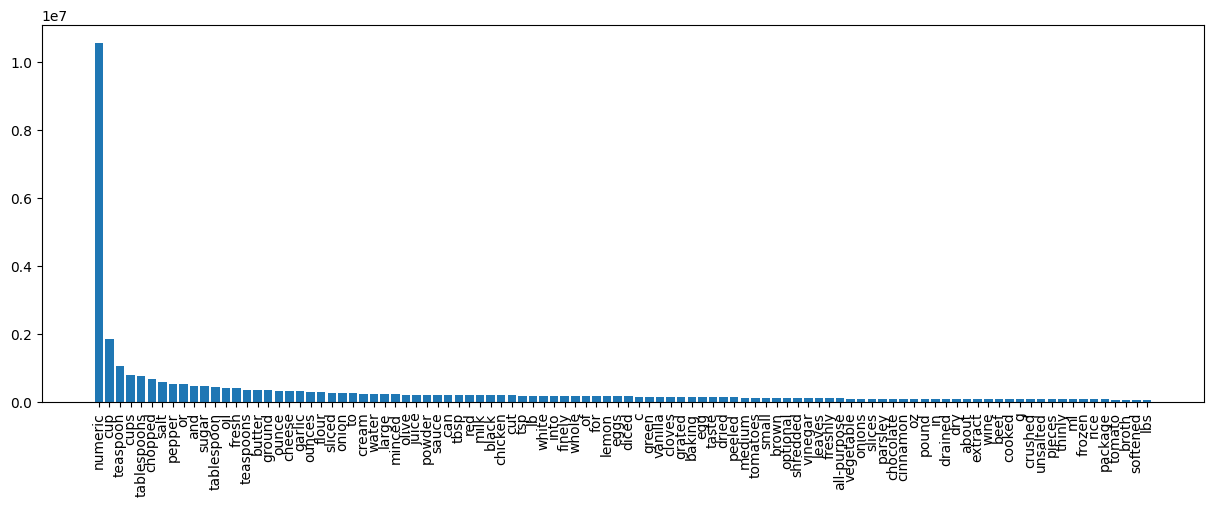

In [4]:
# Plot for ingredients words
# Sort and strip to 100 most used
words_in_ingredients_stripped = sorted(words_in_ingredients.items(), key=lambda x:x[1], reverse=True)[:101]

ingredients_words, ingredients_words_amounts = zip(*words_in_ingredients_stripped)
ingredients_words = list(ingredients_words)
ingredients_words_amounts = list(ingredients_words_amounts)
# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.title("Words in ingredients fields")
plt.bar(ingredients_words[:100], ingredients_words_amounts[:100], align='center')
plt.xticks(rotation='vertical')
plt.show()

### Excluding numeric category

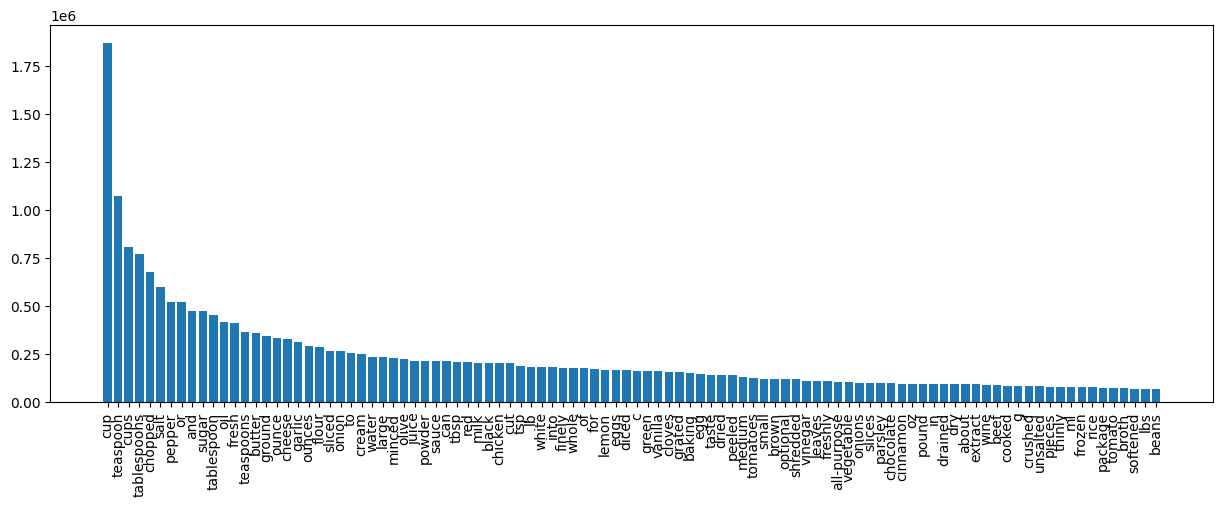

In [5]:
i = ingredients_words.index('numeric')
del ingredients_words[i]
del ingredients_words_amounts[i]

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.title("Words in ingredients fields (excluding numeric)")
plt.bar(ingredients_words, ingredients_words_amounts, align='center')
plt.xticks(rotation='vertical')
plt.show()

## Ingredients
### Including numeric category

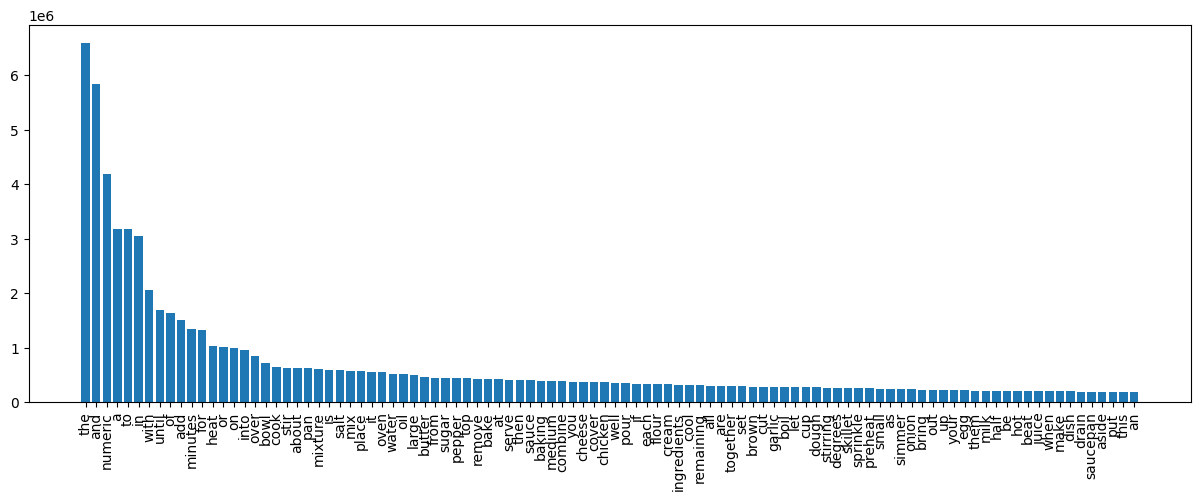

In [6]:
# Plot for instructions words
# Sort and strip to 100 most used
words_in_instructions_stripped = sorted(words_in_instructions.items(), key=lambda x:x[1], reverse=True)[:101]

instructions_words, instructions_words_amounts = zip(*words_in_instructions_stripped)
instructions_words = list(instructions_words)
instructions_words_amounts = list(instructions_words_amounts)

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.title("Words in incstructions fields")
plt.bar(instructions_words[:100], instructions_words_amounts[:100], align='center')
plt.xticks(rotation='vertical')
plt.show()

### Excluding numeric category

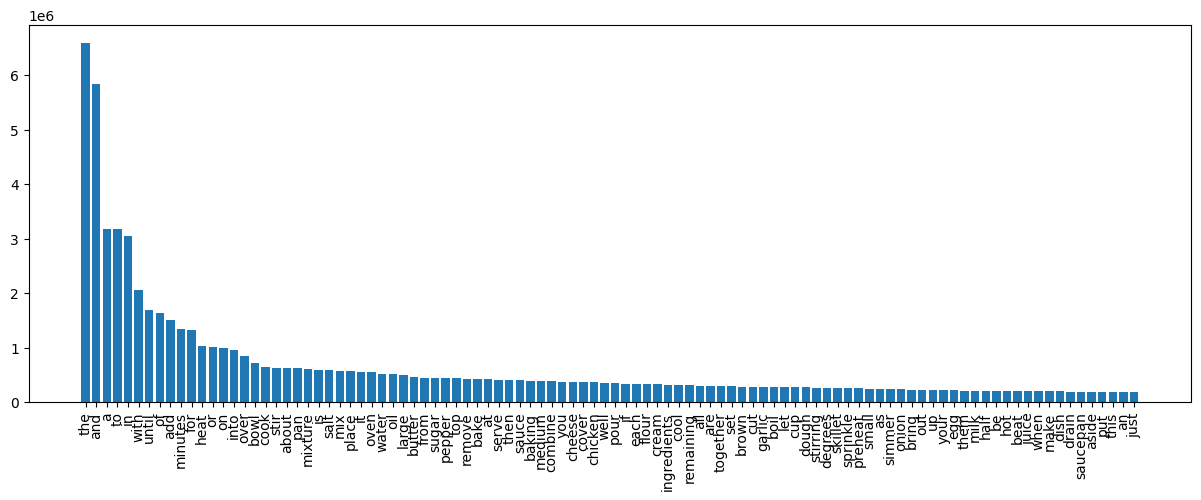

In [7]:
i = instructions_words.index('numeric')
del instructions_words[i]
del instructions_words_amounts[i]

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.title("Words in instructions fields (excluding numeric)")
plt.bar(instructions_words, instructions_words_amounts, align='center')
plt.xticks(rotation='vertical')
plt.show()